In [20]:
from numpy import *

In [21]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

In [22]:
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [28]:
dataMat = loadDataSet('testSet.txt')

In [29]:
lowDMat, reconMat = pca(dataMat, 1)

In [30]:
shape(lowDMat)

(1000, 1)

In [31]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

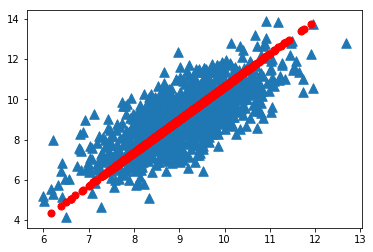

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')

In [33]:
lowDMat, reconMat = pca(dataMat, 2)

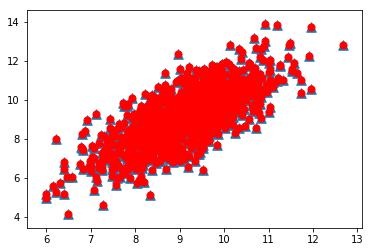

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')

## Reduce dimensionality of semiconductor manufacturing data

In [35]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        datMat[nonzero(isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [36]:
dataMat = replaceNanWithMean()

In [37]:
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals

In [38]:
covMat = cov(meanRemoved, rowvar=0)

In [39]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [44]:
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  

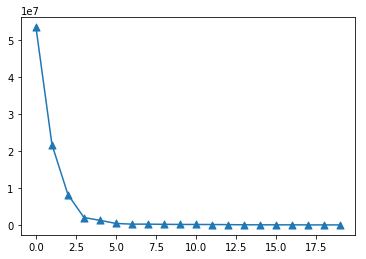

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(20), eigVals[:20], marker='^', s=50)
ax.plot(range(20), eigVals[:20])